# Reconnaîssance des chiffres écrits à la main

Nous commençons par le chargement de tous les modules nécessaires à la réalisation de notre exemple avec le code ci-après.

- La première instruction from sklearn import datasets permet d’importer le module datasets où est défini, le jeu de données Digit
- La deuxième instruction importe la classe MLPClassifier à partir du module sklearn.neural_network qui va nous permettre de définir notre réseau de neurones.
- La fonction accuracy_score importée à partir de sklearn.metrics permet de mesurer la métrique de performance accuracy
- Les dernières instructions permettent d’importer les outils nécessaires pour réaliser des graphique

In [36]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

Chargement du dataset digits dans une variable locale

In [37]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [72]:
data = datasets.load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [68]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Y'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [66]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [69]:
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [25]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

L’instruction dir(data) permet d’afficher les propriétés du jeu de données data.

Les deux seules propriétés qui nous intéressent pour cet exemple sont les attributs suivants :

- images : contient 1797 matrices de 8x8 valeurs. Chaque matrice correspond à l’image d’un chiffre entre 0 et 9.
- Target : vecteur où les classes associées aux images sont définies. Par exemple target[10] va contenir le chiffre associé à l’image images[10].

In [38]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [39]:
data.images.shape

(1797, 8, 8)

In [40]:
print(f"Il y a {len(data.target)} classe dans data.target = {data.target}")


Il y a 1797 classe dans data.target = [0 1 2 ... 8 9 8]


Vous pouvez également accéder aux matrices associées aux images, comme le montre l’instruction suivante qui affiche la matrice associée à la toute première image

In [41]:
print(data.images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


En analysant les différentes zones de cette matrice, nous pouvons percevoir l’allure du chiffre zéro. Justement, la classe associée à cette première image est la classe représentée avec le chiffre 0 que nous pouvons vérifier en affichant la valeur de data.target[0] qui est égale à 0 !

In [42]:
data.target[2]

2

Pour visualiser certaines des images du jeu de données Digit

La fonction plot_digits affiche les douze images successives du data.images en commençant par la première image située à la position indiquée par start qui est le seul argument de cette fonction.

La dernière instruction de ce code est un appel à la fonction plot_digits avec comme argument la valeur 1000

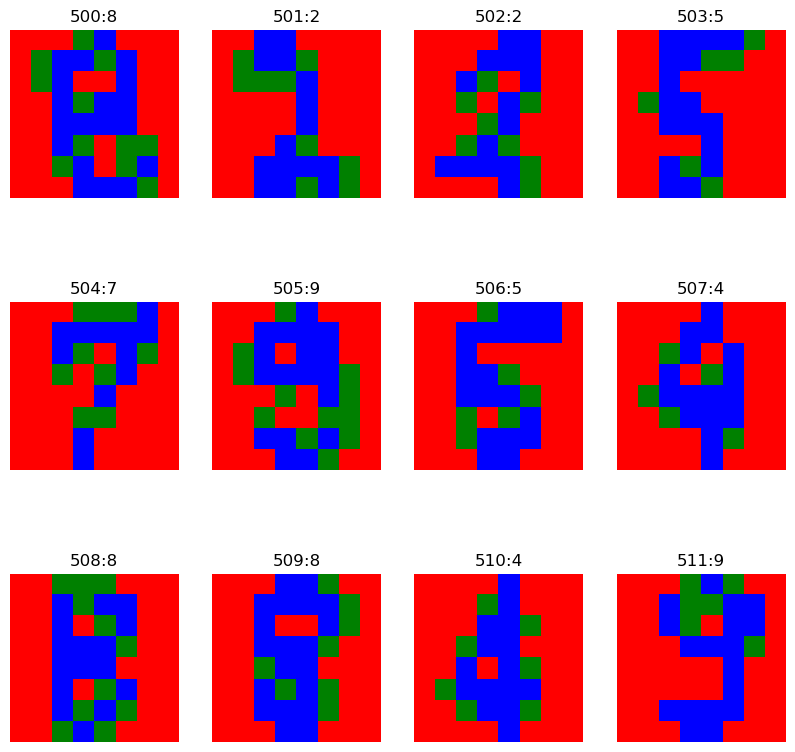

In [48]:
def plot_digits(start):    
    fig = plt.figure(figsize=(10,10))
    cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])
    for im in range(12):
        plt.subplot(3,4,im+1)
        title = str(start+im) + ":" + str(data.target[start+im])
        plt.title(title)
        plt.imshow(data.images[start+im], cmap=cmap)     
        plt.axis('off')
    plt.show()
plot_digits(500)

Dans notre exemple, nous allons appliquer un réseau de neurones simple suivant la procédure de la rétropropagation. Dans un tel algorithme, chacun des nœuds de la première couche, ou de la couche d’entrée, reçoit une valeur.

Sachant que les données dont nous disposons dans notre exemple sont organisées sous forme de matrices, il est donc nécessaire d’aplatir ou de transformer ces matrices sous forme de vecteurs.

Le code suivant permet de réorganiser les images sous forme de tableaux. La première instruction permet de sauvegarder dans la variable y les classes associées aux images et la variable x permet de sauvegarder chacune des matrices dans un seul vecteur.

In [49]:
len(data.images)

1797

In [10]:
y = data.target
x = data.images.reshape((len(data.images), -1))

Cela signifie que les données sont constituées de 1797 vecteurs avec chaque vecteur de taille 64. Pour rappel, la taille de ces vecteurs vient du fait que les matrices data.images sont constituées de 8x8=64 valeurs

In [50]:
x.shape

(1797, 64)

À partir des données de x et y, l’instruction ci-dessous construit le jeu de données d’entraînement (x_train, y_train) et le jeu de données de test (x_test, y_test). Les données situées entre l’indice 0 et l’indice 1346 seront utilisées pour l’entraînement du réseau de neurones et les données situées entre les indices 1347 et 1796 seront utilisées pour la phase de validation.

In [12]:
x_train, y_train, x_test, y_test  = x[:1347], y[:1347], x[1347:], y[1347:]

À ce stade, nous sommes prêts pour la création de notre réseau de neurones. À cet effet, le code suivant utilise la classe MLPClassifier afin d’instancier un réseau de neurones suivant les paramètres fournis en arguments.

À l’exécution de ce dernier code, la variable mlp_classifier représente une instance de notre réseau de neurones.

Les arguments utilisés pour la création de ce réseau de neurones sont définis comme suit :

    hidden_layer_sizes : ce paramètre est un tuple qui indique l’architecture du réseau de neurones. Dans notre exemple, nous avons positionné ce paramètre à 20 pour indiquer que le réseau de neurones que nous souhaitons mettre en place est constitué d’une couche cachée définie par vingt neurones. Cela signifie que notre réseau de neurones dans son ensemble sera constitué de trois couches au total : une couche d’entrée, la couche cachée définie par ce paramètre et la couche de sortie. Si nous voulions mettre une architecture avec, par exemple, trois couches cachées dont la première couche serait constituée de quarante neurones, la deuxième couche cachée constituée de dix neurones, puis une troisième couche cachée constituée de vingt neurones, alors ce paramètre serait fixé ainsi : hidden_layer_sizes=(40,10,30). Il faut bien se rappeler que ce paramètre ne définit ni la couche d’entrée ni la couche de sortie.

    activation : ce paramètre indique la fonction d’activation à utiliser au sein des neurones des couches cachées. Nous pouvons choisir parmi les quatre fonctions suivantes :

    identity : pour indiquer que la valeur à la sortie d’un neurone est la même qu’à l’entrée.

    logistic : c’est la fameuse fonction logistique que nous avons vue au chapitre La régression logistique.

    tanh : c’est la fonction tangente hyperbolique.
    relu : pour Rectified Linear Unit qui est définie avec images/13eq93.PNG.

    solver : ce paramètre indique la fonction à utiliser pour l’ajustement des poids du réseau de neurones. Cette fonction peut être l’une des trois fonctions lbfgs, sgd ou adam. Nous n’allons pas entrer dans les détails de ces fonctions, car chacune d’elles mériterait largement qu’on lui consacre un livre entier… au minimum ! Cependant, il faut retenir que ces méthodes font partie principalement des méthodes d’optimisation stochastiques issues du monde de la programmation mathématique. 

    tol : ce paramètre doit être considéré conjointement avec le paramètre n_iter_no_change. La valeur de tol correspond à un seuil d’amélioration des erreurs sur les données d’entraînement. Si au bout de n_iter_no_change itérations successives du réseau de neurones le résultat des prédictions sur les données d’entraînement ne s’améliore pas d’une valeur supérieure ou égale à la valeur de tol, alors l’algorithme s’arrête et considère que le réseau de neurones a convergé.  

    n_iter_no_change : comme expliqué précédemment, ce paramètre correspond au nombre d’itérations successives du réseau de neurones qui devrait améliorer la qualité des prédictions par au moins une valeur égale à tol.  

    random_state : ce paramètre permet de fixer la première valeur du générateur de nombres aléatoires utilisé par l’algorithme afin de pouvoir reproduire les mêmes résultats lorsque l’algorithme est appliqué sur les mêmes données d’entraînement.

    alpha : ce paramètre correspond à un terme de régularisation de type L2.

    learning_rate_init : ce paramètre indique le taux d’apprentissage initial qui sera utilisé pour la mise à jour des poids du réseau de neurones.

    verbose : lorsqu’il est égal à True, ce paramètre indique notre souhait de visualiser les résultats au fur et à mesure des itérations du réseau de neurones.



In [52]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic',
                    solver='sgd', tol=0.01, n_iter_no_change=30, random_state=1, alpha=0.0001, learning_rate_init=.1, verbose=True)

L’instruction suivante permet de réaliser les itérations du réseau de neurones sur les données d’entraînement en utilisant la fameuse fonction fit 

In [53]:
mlp_classifier.fit(x_train,y_train)

Iteration 1, loss = 2.11541077
Iteration 2, loss = 1.57554613
Iteration 3, loss = 1.09801886
Iteration 4, loss = 0.73154274
Iteration 5, loss = 0.50055650
Iteration 6, loss = 0.35982359
Iteration 7, loss = 0.27664221
Iteration 8, loss = 0.22433407
Iteration 9, loss = 0.18744375
Iteration 10, loss = 0.16000843
Iteration 11, loss = 0.14162545
Iteration 12, loss = 0.12927647
Iteration 13, loss = 0.11615470
Iteration 14, loss = 0.10479092
Iteration 15, loss = 0.09712149
Iteration 16, loss = 0.09136116
Iteration 17, loss = 0.08460672
Iteration 18, loss = 0.07779865
Iteration 19, loss = 0.07367984
Iteration 20, loss = 0.06950367
Iteration 21, loss = 0.06492229
Iteration 22, loss = 0.06197923
Iteration 23, loss = 0.05831109
Iteration 24, loss = 0.05514949
Iteration 25, loss = 0.05270835
Iteration 26, loss = 0.05078068
Iteration 27, loss = 0.04873687
Iteration 28, loss = 0.04666945
Iteration 29, loss = 0.04455524
Iteration 30, loss = 0.04335551
Iteration 31, loss = 0.04077589
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
              learning_rate_init=0.1, n_iter_no_change=30, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

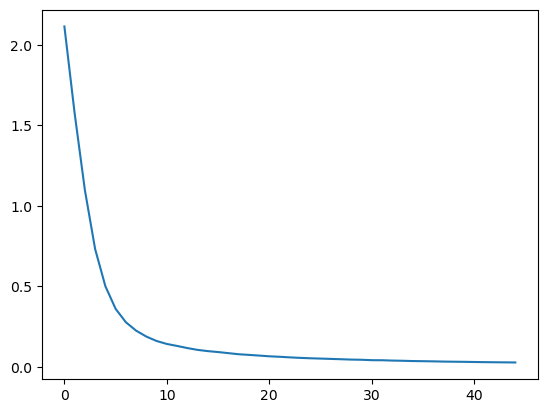

In [54]:
plt.plot(mlp_classifier.loss_curve_)
plt.show()

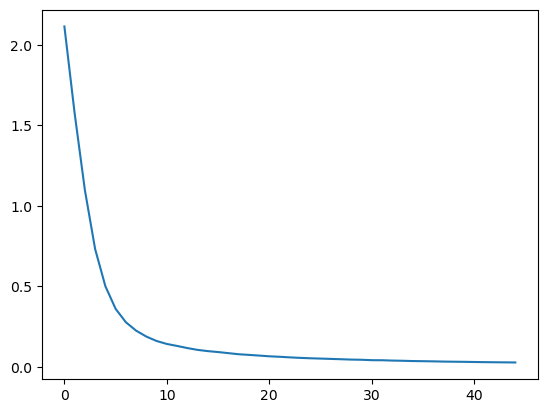

In [55]:
plt.plot(mlp_classifier.loss_curve_)
plt.show()

In [56]:
type(mlp_classifier)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

À la fin de l’exécution de la fonction fit, nous pouvons utiliser le réseau de neurones afin de réaliser les prédictions sur les données de test pour ainsi évaluer son efficacité. La première instruction du code ci-dessous permet de prédire les classes associées aux données de test x_test en utilisant notre réseau de neurones et la deuxième instruction calcule la valeur de la métrique de performance accuracy.  

In [57]:
predictions = mlp_classifier.predict(x_test)
predictions

array([3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9,
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 3, 8, 4,
       1, 7, 7, 3, 5, 9, 0, 0, 2, 2, 7, 8, 2, 0, 9, 2, 6, 3, 3, 7, 3, 3,
       4, 6, 6, 6, 4, 9, 9, 5, 0, 9, 5, 2, 3, 2, 0, 0, 9, 7, 6, 3, 2, 1,
       7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9, 6, 9,
       7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 7, 9, 8,
       0, 1, 2, 3, 4, 5, 1, 8, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3,
       4, 5, 1, 7, 1, 7, 4, 9, 5, 5, 6, 5, 0, 9, 4, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 6, 0, 2, 2, 4, 8, 2, 0, 1, 2, 6, 2, 3, 7, 3, 3, 4, 6, 6, 6,
       1, 9, 1, 5, 0, 9, 5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 1, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 4,

In [58]:
accuracy_score(y_test, predictions)

0.9222222222222223

In [59]:
print(f"     y_test[10:20] = {y_test[10:20]}")
print(f"predictions[10:20] = {predictions[10:20]}")



     y_test[10:20] = [1 5 0 9 5 2 8 2 0 0]
predictions[10:20] = [1 5 0 9 6 2 8 2 0 0]
